In [1]:
import pandas as pd
import numpy as np
import os
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:

# Define categories and LBP parameters
Categories = ['cats', 'dogs']
radius = 1
n_points = 8 * radius
method = "uniform"

# Initialize data storage
flat_data_arr = []
target_arr = []

# Define dataset directory (fix Unicode escape issue)
datadir = r"D:\Datasets\New folder (2)\DS"

# Load and process images
for category in Categories:
    print(f'Loading... Category: {category}')
    path = os.path.join(datadir, category)
    print(f"Path: {path}")

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        try:
            # Load image
            img_array = imread(img_path)

            # Resize to fixed dimensions
            img_resized = resize(img_array, (150, 150, 3))  # Resize to 150x150x3

            # Convert to grayscale
            img_gray = rgb2gray(img_resized)

            # Compute LBP features
            lbp = local_binary_pattern(img_gray, n_points, radius, method=method)
            lbp_hist, _ = np.histogram(
                lbp.ravel(),
                bins=np.arange(0, n_points + 3),  # Uniform LBP bins
                range=(0, n_points + 2)
            )
            lbp_hist = lbp_hist / (lbp_hist.sum() + 1e-6)  # Normalize histogram

            # Append features and label
            flat_data_arr.append(lbp_hist)
            target_arr.append(Categories.index(category))

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

    print(f'Loaded category: {category} successfully')

# Convert to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

print("Data prepared successfully.")


Loading... Category: cats
Path: D:\Datasets\New folder (2)\DS\cats


C:\Users\PC\anaconda3\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Loaded category: cats successfully
Loading... Category: dogs
Path: D:\Datasets\New folder (2)\DS\dogs
Loaded category: dogs successfully
Data prepared successfully.


In [4]:
flat_data.shape

(160, 10)

In [5]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(160, 11)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,Target
0,0.088933,0.092578,0.074000,0.101600,0.134089,0.102756,0.071289,0.094933,0.086089,0.153733,0
1,0.048978,0.067244,0.071644,0.156489,0.249022,0.133911,0.066844,0.068044,0.048311,0.089511,0
2,0.042267,0.063200,0.063378,0.140178,0.250000,0.154356,0.062844,0.058356,0.086978,0.078444,0
3,0.052844,0.077956,0.072756,0.144311,0.231244,0.118489,0.058622,0.079156,0.059289,0.105333,0
4,0.039956,0.057689,0.062444,0.151111,0.321600,0.153911,0.059156,0.052933,0.034089,0.067111,0
...,...,...,...,...,...,...,...,...,...,...,...
155,0.084889,0.091822,0.067556,0.099289,0.170489,0.104133,0.067556,0.080222,0.083822,0.150222,1
156,0.071822,0.084400,0.075689,0.119911,0.177644,0.113644,0.066933,0.080444,0.081156,0.128356,1
157,0.075422,0.081733,0.077867,0.108711,0.169822,0.129689,0.075422,0.077111,0.070133,0.134089,1
158,0.082489,0.094978,0.070711,0.109244,0.137644,0.114978,0.079644,0.084444,0.078089,0.147778,1


In [7]:
#input data 
x=df.iloc[:,:-1] 
#output data
y=df.iloc[:,-1]

In [8]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=42)


In [9]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=32)

In [10]:
# Training the model using the training data
model.fit(x_train,y_train)


SVC(kernel='linear', random_state=32)

In [11]:
# Testing the model using the testing data
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")


[1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0]
The model is 65.625% accurate


In [12]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [13]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


              precision    recall  f1-score   support

         cat       0.73      0.50      0.59        16
         dog       0.62      0.81      0.70        16

    accuracy                           0.66        32
   macro avg       0.67      0.66      0.65        32
weighted avg       0.67      0.66      0.65        32



In [37]:
path=r'DS/cats/cat.54.jpg'
img=imread(path)
img_resized = resize(img_array, (150, 150, 3))  # Ensure a fixed size
img_gray = rgb2gray(img_resized)
lbp = local_binary_pattern(img_gray, n_points, radius, method=method)
lbp_hist, _ = np.histogram(lbp.ravel(),bins=np.arange(0, n_points + 3),  range=(0, n_points + 2))
lbp_hist = lbp_hist / (lbp_hist.sum() + 1e-6)

In [48]:
lbp_hist.reshape(1, -1)

array([[0.05564444, 0.07542222, 0.0744    , 0.13213333, 0.23733333,
        0.13568889, 0.07328889, 0.06702222, 0.05053333, 0.09853333]])

C:\Users\PC\anaconda3\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


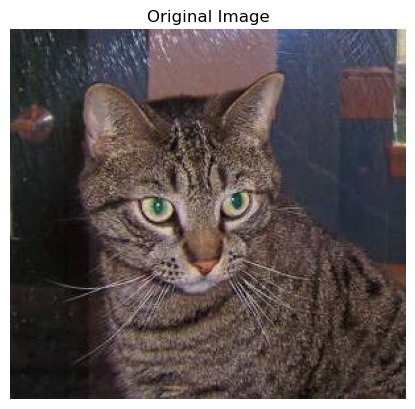

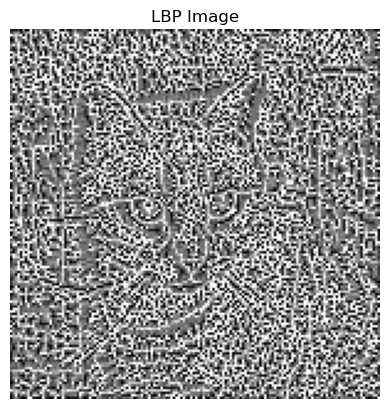

Class: Cat
Predicted Value: [1]


In [19]:
# Load and preprocess the image
path = r'D:\Datasets\Nf\DS\cats\cat.1.jpg'
img = imread(path)
img_resized = resize(img, (150, 150, 3))  # Ensure a fixed size
img_gray = rgb2gray(img_resized)

# Extract LBP features
lbp = local_binary_pattern(img_gray, n_points, radius, method=method)
lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
lbp_hist = lbp_hist / (lbp_hist.sum() + 1e-6)

# Visualize the original image
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Visualize the LBP image
plt.imshow(lbp, cmap='gray')
plt.title("LBP Image")
plt.axis('off')
plt.show()

# Predict class
Predicted_value = model.predict(lbp_hist.reshape(1, -1))
if Predicted_value >= 0.5:
    print("Class: Cat")
else:
    print("Class: Dog")
print("Predicted Value:", Predicted_value)


In [20]:
Predicted_value=model.predict(lbp_hist.reshape(1, -1))
Predicted_value

array([1])

C:\Users\PC\anaconda3\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


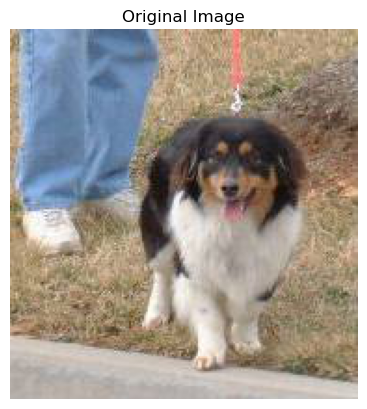

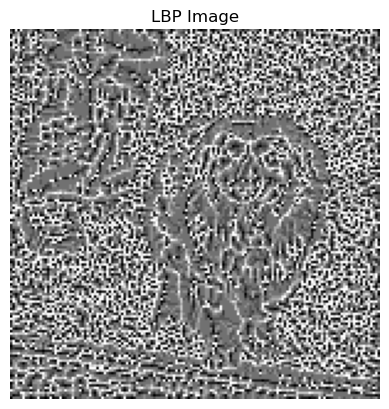

Class: Cat
Predicted Value: [1]


In [28]:
#load image 
path = r'D:\Datasets\Nf\DS\dogs\dog.2.jpg'
img = imread(path)
img_resized = resize(img, (150, 150, 3))  # Ensure a fixed size
img_gray = rgb2gray(img_resized)

# Extract LBP features
lbp = local_binary_pattern(img_gray, n_points, radius, method=method)
lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
lbp_hist = lbp_hist / (lbp_hist.sum() + 1e-6)

# Visualize the original image
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Visualize the LBP image
plt.imshow(lbp, cmap='gray')
plt.title("LBP Image")
plt.axis('off')
plt.show()

# Predict class
Predicted_value = model.predict(lbp_hist.reshape(1, -1))
if Predicted_value >= 0.5:
    print("Class: Cat")
else:
    print("Class: Dog")
print("Predicted Value:", Predicted_value)